#  Data Ingestion Using Python
**# In this ETL pipeline i  used pandas libarary  and Pyodbc libarry and for basic data visualtization i used searborn library**

**data fetching and data transformation on value column and created new column transform column


In [33]:
# here i import the necessary libarary for ETL Pipeline
import pandas as pd
import pyodbc

In [34]:
df =pd.read_csv(r"C:\Users\THINK\Desktop\ETL PIPELINE\Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv"
                         )
df['Transform_colum']= df['Value'] * 4
df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly,Transform_colum
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.0,No Units,No Units,Monitor Only,1,132.0
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1,20.0
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1,156.0
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1,112.0
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1,124.0


In [39]:
#srouce table count
len(df)

218635

#
**here i added date column in the dataset,if we maintain history in this etl pipeline , so this date column helpful to identify always latest data with the help of date column

In [35]:
df['date'] = pd.Timestamp("today").strftime("%Y-%m-%d")

After adding date column in the dataset i just convert complete data into a dataframe 

In [36]:
df =pd.DataFrame(df)
df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly,Transform_colum,date
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.0,No Units,No Units,Monitor Only,1,132.0,2022-04-02
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1,20.0,2022-04-02
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1,156.0,2022-04-02
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1,112.0,2022-04-02
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1,124.0,2022-04-02


after fectching data from source and after data transformation here i created connection for targeted database,here i use SQL Server 
for the targeted database, and i ingest the complete source data file in the sql db.

In [5]:

server = "DESKTOP-G87QUGF"
db = 'test'
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' +
                      db + ';Trusted_Connection=yes')
cursor = conn.cursor()
cursor

I write the code for create the table schema or table structure in Sql db, table name is Air_Quality 

In [6]:
cursor.execute('''
    CREATE TABLE Air_Quality (
     MeasureId  int,
MeasureName  nvarchar(1000),
MeasureType   nvarchar(100),
StratificationLevel   nvarchar(100),
StateFips   nvarchar(100),
StateName   nvarchar(100),
CountyFips    nvarchar(100),
CountyName    nvarchar(100),
ReportYear    nvarchar(100),
Value   int,
Unit    nvarchar(100),
UnitName    nvarchar(100),
DataOrigin    nvarchar(100),
MonitorOnly  nvarchar(100),
date nvarchar(20),
Transform_colum decimal(18,3)

      )
               ''')


when our ETL run on the daily basic first Target table truncated and then latest data stored in the sql table, but if we want to maintain the history in the target table so we can  remove the trucate table code for maintain the history

In [7]:
truncate_query = """ Truncate table  [Air_Quality] """
cursor.execute(truncate_query)

data insertion from source to sql database table 

In [8]:
for row in df.itertuples(truncate_query):
    cursor.execute('''
                INSERT INTO Air_Quality (    MeasureId,
MeasureName,
MeasureType,
StratificationLevel,
StateFips,
StateName,
CountyFips,
CountyName,
ReportYear,
Value,
Unit,
UnitName,
DataOrigin,
MonitorOnly,
date,Transform_colum)
                VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                ''',
               row.MeasureId,
row.MeasureName,
row.MeasureType,
row.StratificationLevel,
row.StateFips,
row.StateName,
row.CountyFips,
row.CountyName,
row.ReportYear,
row.Value,
row.Unit,
row.UnitName,
row.DataOrigin,
row.MonitorOnly,
row.date,
row.Transform_colum
                )
conn.commit()

after data insertion in the targeted table, here i read data from the target table sql dbms

In [11]:
query = "SELECT * FROM test.dbo.Air_Quality;"
df1 = pd.read_sql(query, conn)
df1.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly,date,Transform_colum
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33,No Units,No Units,Monitor Only,1,2022-04-02,132.0
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5,No Units,No Units,Monitor Only,1,2022-04-02,20.0
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39,No Units,No Units,Monitor Only,1,2022-04-02,156.0
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28,No Units,No Units,Monitor Only,1,2022-04-02,112.0
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31,No Units,No Units,Monitor Only,1,2022-04-02,124.0


In [41]:
# targeted table count
len(df1)

218635

BASIC data presenting using barplot seaborn 

Text(0.5, 1.0, 'BarPlot for Report Year vs Value')

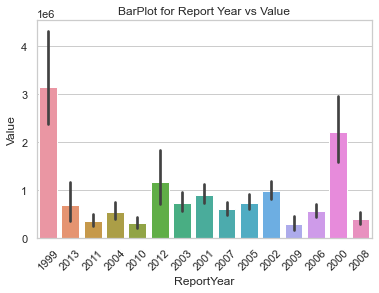

In [55]:
import seaborn as sn
chart = sn.barplot(x='ReportYear',y='Value',data=df1,)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title("BarPlot for Report Year vs Value")

In [72]:
# In this ETL pipeline i  used pandas libarary  and Pyodbc libarry and for basic data visualtization i used searborn library 
